In [3]:
## 분류 DNN 모델 구현 ########################
from keras import layers, models


class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_l[0], activation='relu',
                              input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))

        self.add(layers.Dense(Nh_l[1], activation='relu',
                              name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))

        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])


# 데이터 준비 ##############################
import numpy as np
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


# 학습 효과 분석 ##############################
from ann_mnist_cl import plot_loss, plot_acc
import matplotlib.pyplot as plt


# 분류 DNN 학습 및 테스팅 ####################
def main():
    Nh_l = [100, 50]
    Pd_l = [0.0, 0.0]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s - loss: 1.9446 - acc: 0.3004 - val_loss: 1.8597 - val_acc: 0.3188
Epoch 2/100
40000/40000 [==============================] - 3s - loss: 1.7665 - acc: 0.3735 - val_loss: 1.7521 - val_acc: 0.3664
Epoch 3/100
40000/40000 [==============================] - 3s - loss: 1.6916 - acc: 0.3976 - val_loss: 1.6985 - val_acc: 0.3945
Epoch 4/100
40000/40000 [==============================] - 3s - loss: 1.6456 - acc: 0.4136 - val_loss: 1.6577 - val_acc: 0.4103
Epoch 5/100
40000/40000 [==============================] - 3s - loss: 1.6017 - acc: 0.4309 - val_loss: 1.6228 - val_acc: 0.4229
Epoch 6/100
40000/40000 [==============================] - 3s - loss: 1.5773 - acc: 0.4368 - val_loss: 1.6021 - val_acc: 0.4270
Epoch 7/100
40000/40000 [==============================] - 3s - loss: 1.5520 - acc: 0.4490 - val_loss: 1.5918 - val_acc: 0.4349
Epoch 8/100
40000/40000 [=============================

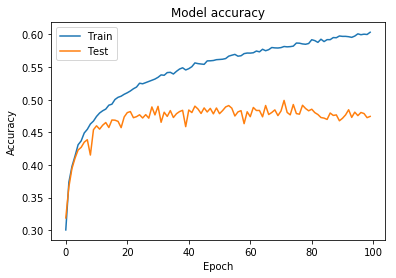

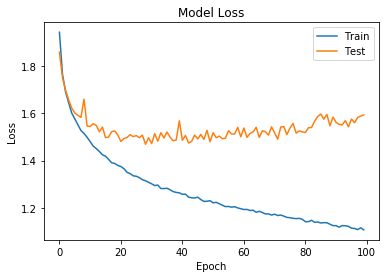

In [4]:
main()